<a href="https://colab.research.google.com/github/Ayushmaan-0412/Apple-Stocks-Prediction/blob/main/Stock%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("Apple.csv")
df = df.iloc[9500:]
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
9500,15-08-2018,52.305000,52.685001,52.082500,52.560001,50.781948,115230400
9501,16-08-2018,52.937500,53.452499,52.867500,53.330002,51.525898,114001600
9502,17-08-2018,53.360001,54.487499,53.290001,54.395000,52.554874,141708000
9503,20-08-2018,54.525002,54.794998,53.777500,53.865002,52.042805,121150800
9504,21-08-2018,54.200001,54.297501,53.507500,53.759998,51.941353,104639200


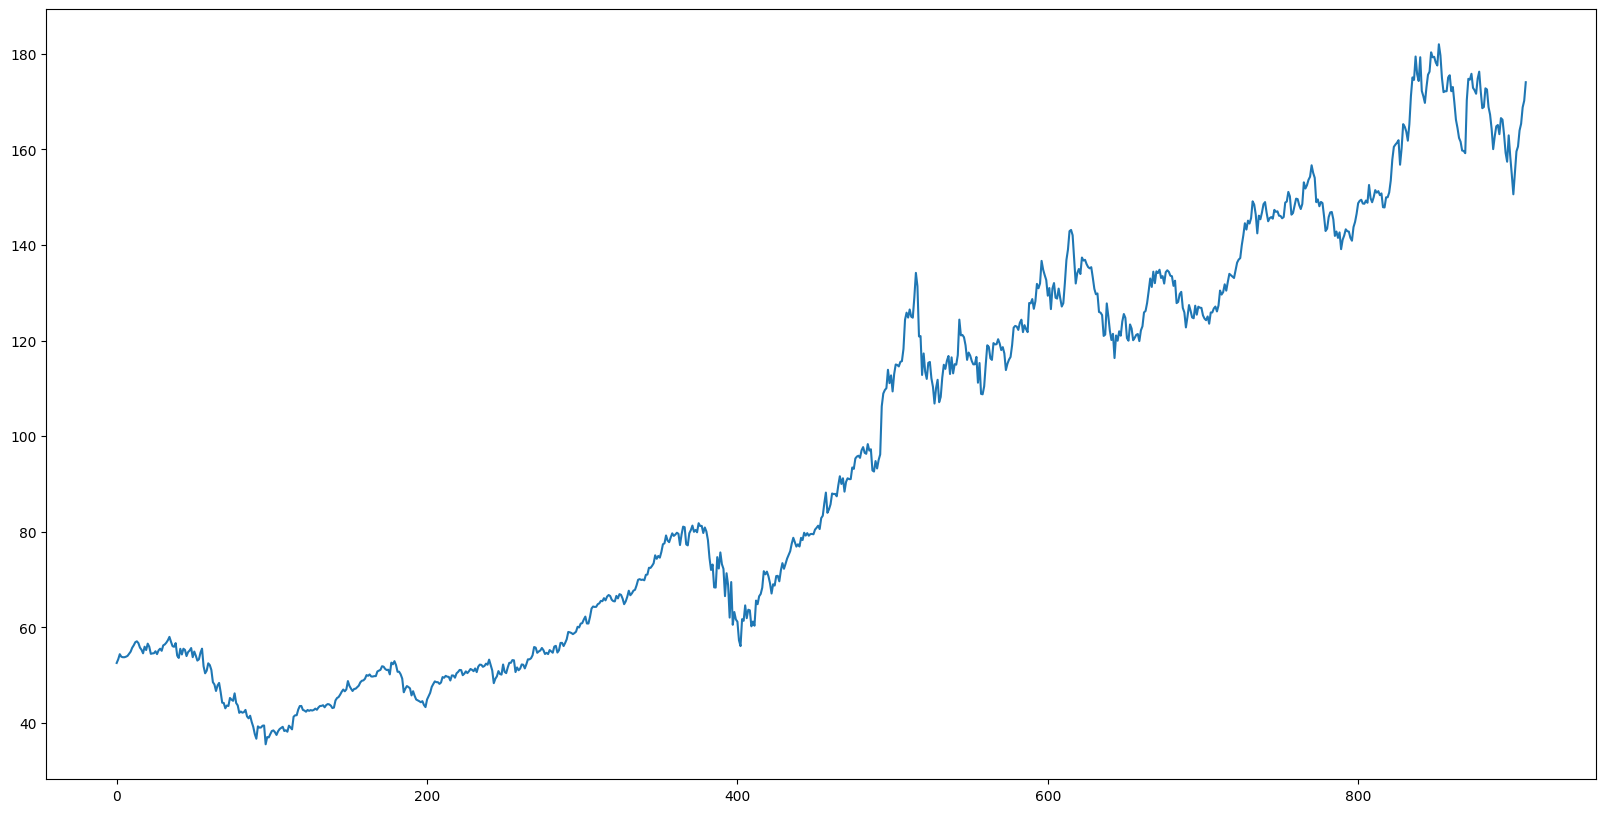

In [34]:
df1=df.reset_index()['Close']
df1
import matplotlib.pyplot as plt
plt.plot(df1)

In [35]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))# has only 1 col now
print(df1)


[[0.11615602]
 [0.12141334]
 [0.12868482]
 [0.12506616]
 [0.12434922]
 [0.12436631]
 [0.12511736]
 [0.12626099]
 [0.12929931]
 [0.13230348]
 [0.13790219]
 [0.14140138]
 [0.14583938]
 [0.14708543]
 [0.14454211]
 [0.13810704]
 [0.13503457]
 [0.12996501]
 [0.13938723]
 [0.13464199]
 [0.14375694]
 [0.13937014]
 [0.1291969 ]
 [0.12981139]
 [0.13003328]
 [0.13286677]
 [0.12882138]
 [0.13416402]
 [0.13655373]
 [0.13353247]
 [0.14126482]
 [0.1426133 ]
 [0.14520781]
 [0.1486558 ]
 [0.15341812]
 [0.14645388]
 [0.14013825]
 [0.13925067]
 [0.14454211]
 [0.12660237]
 [0.12334214]
 [0.13641717]
 [0.12830929]
 [0.13648543]
 [0.13484681]
 [0.12602202]
 [0.13163778]
 [0.13392505]
 [0.13747545]
 [0.12443457]
 [0.13247419]
 [0.12649996]
 [0.11956986]
 [0.1213792 ]
 [0.13086968]
 [0.13660493]
 [0.1114449 ]
 [0.10139113]
 [0.10511223]
 [0.115661  ]
 [0.1131689 ]
 [0.10630707]
 [0.08872578]
 [0.08541435]
 [0.07614577]
 [0.08401468]
 [0.08763335]
 [0.07454126]
 [0.05938379]
 [0.05904241]
 [0.05137832]
 [0.05

In [36]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(636, 273)

In [37]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1): #prev 100 elements
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a) # 101st added
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [38]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [39]:
print(X_train.shape), print(y_train.shape) # 100 features

(535, 100)
(535,)


(None, None)

In [40]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Epoch 1/150
9/9 [==============================] - 7s 244ms/step - loss: 0.0449 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0058
Epoch 2/150
9/9 [==============================] - 1s 118ms/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0297 - val_accuracy: 0.0058
Epoch 3/150
9/9 [==============================] - 1s 121ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0058
Epoch 4/150
9/9 [==============================] - 1s 118ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0058
Epoch 5/150
9/9 [==============================] - 1s 117ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0058
Epoch 6/150
9/9 [==============================] - 1s 119ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0058
Epoch 7/150
9/9 [==============================] - 1s 118ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_ac

In [44]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 22ms/step


In [45]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict) #tranforming back from 01
test_predict=scaler.inverse_transform(test_predict)

In [46]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

83.79200858348949

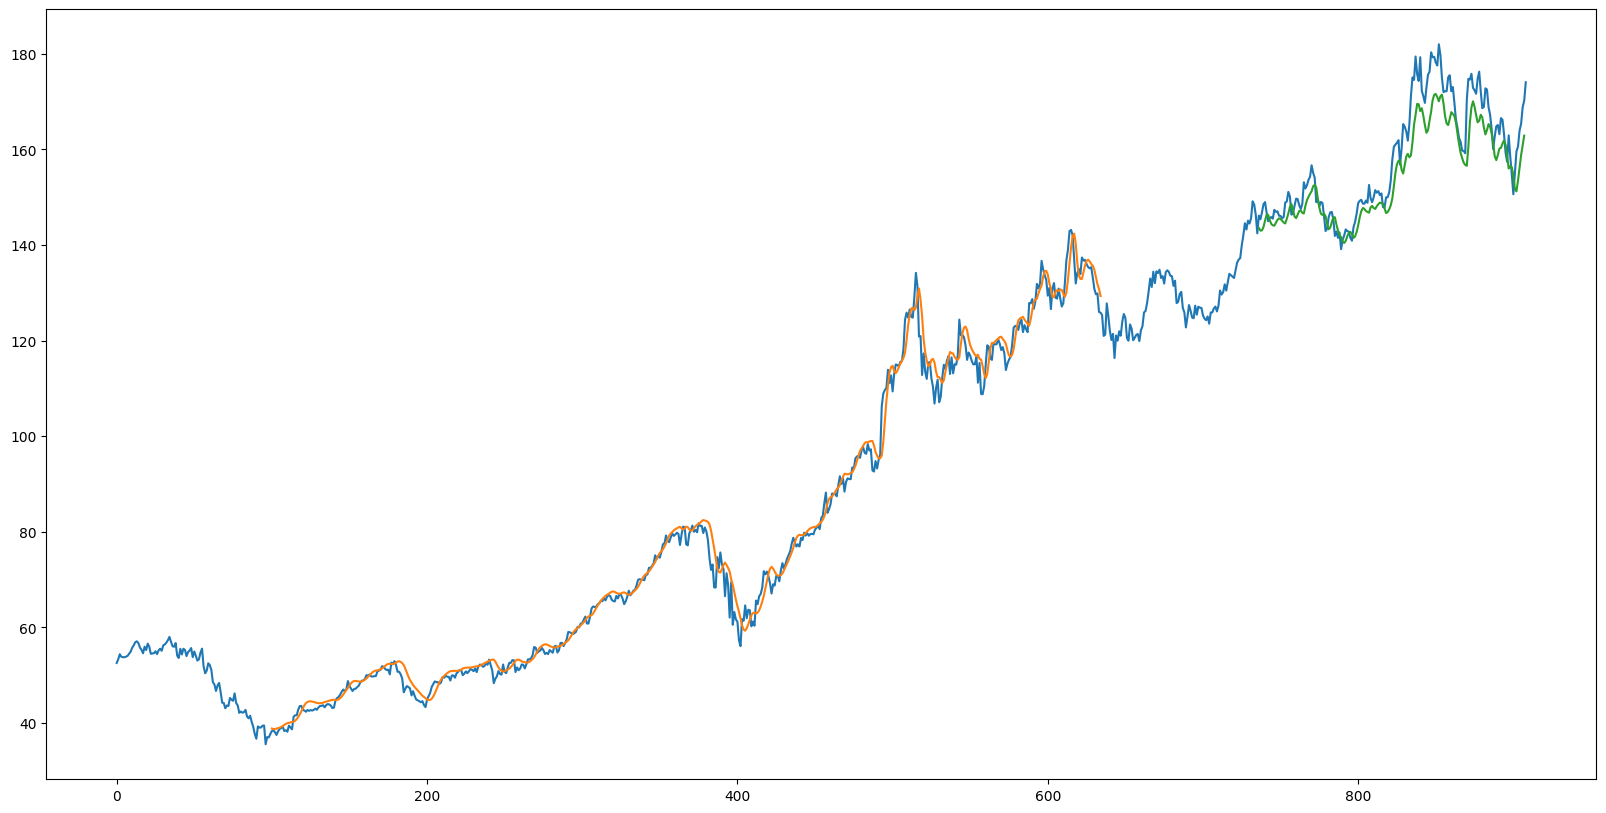

In [47]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)


273

In [49]:
x_input=test_data[173:].reshape(1,-1) #last 100 for prediction
x_input.shape

(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [51]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.89205927]
101
1 day input [0.78158237 0.79161907 0.78800041 0.79018522 0.78444998 0.7869762
 0.76724419 0.76690278 0.78137755 0.78144579 0.78827347 0.80527445
 0.83517965 0.8534779  0.85668692 0.85934972 0.86296838 0.82794232
 0.85136133 0.88590941 0.88229075 0.87539472 0.86228557 0.88604599
 0.92605614 0.95268418 0.94913376 0.98252114 0.95719047 0.94756342
 0.98149702 0.93343006 0.92578307 0.9162926  0.93841434 0.95650766
 0.96087738 0.98852953 0.98142868 0.98204325 0.97398653 0.96968515
 1.         0.98422806 0.95159172 0.93165489 0.93281558 0.93295217
 0.95268418 0.95575662 0.93295217 0.93896056 0.916634   0.89225911
 0.88051549 0.86617741 0.86078347 0.84822056 0.84760608 0.84439706
 0.92025267 0.95063585 0.94947516 0.95787318 0.93779977 0.93431768
 0.92933351 0.95097726 0.96087738 0.93247418 0.90871386 0.91035254
 0.93704872 0.93541014 0.91035254 0.89956479 0.87921831 0.85020064
 0.86843055 0.88283697 0.88468037 0.87157123 0.89451226 0.89225911
 0.87136641 0.84494329 0.83224379 

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)


909

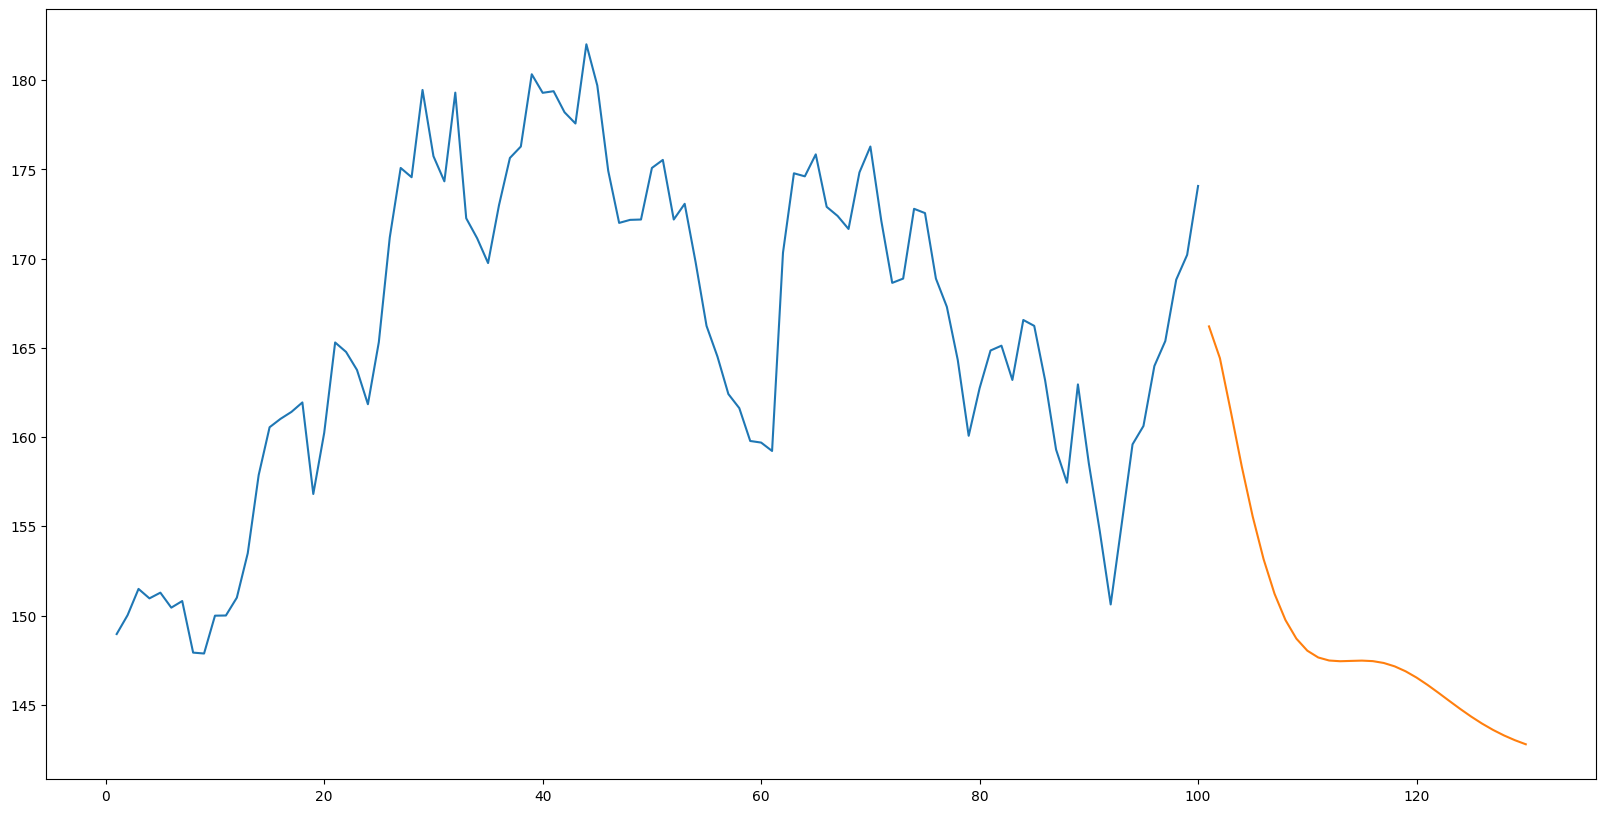

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[809:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

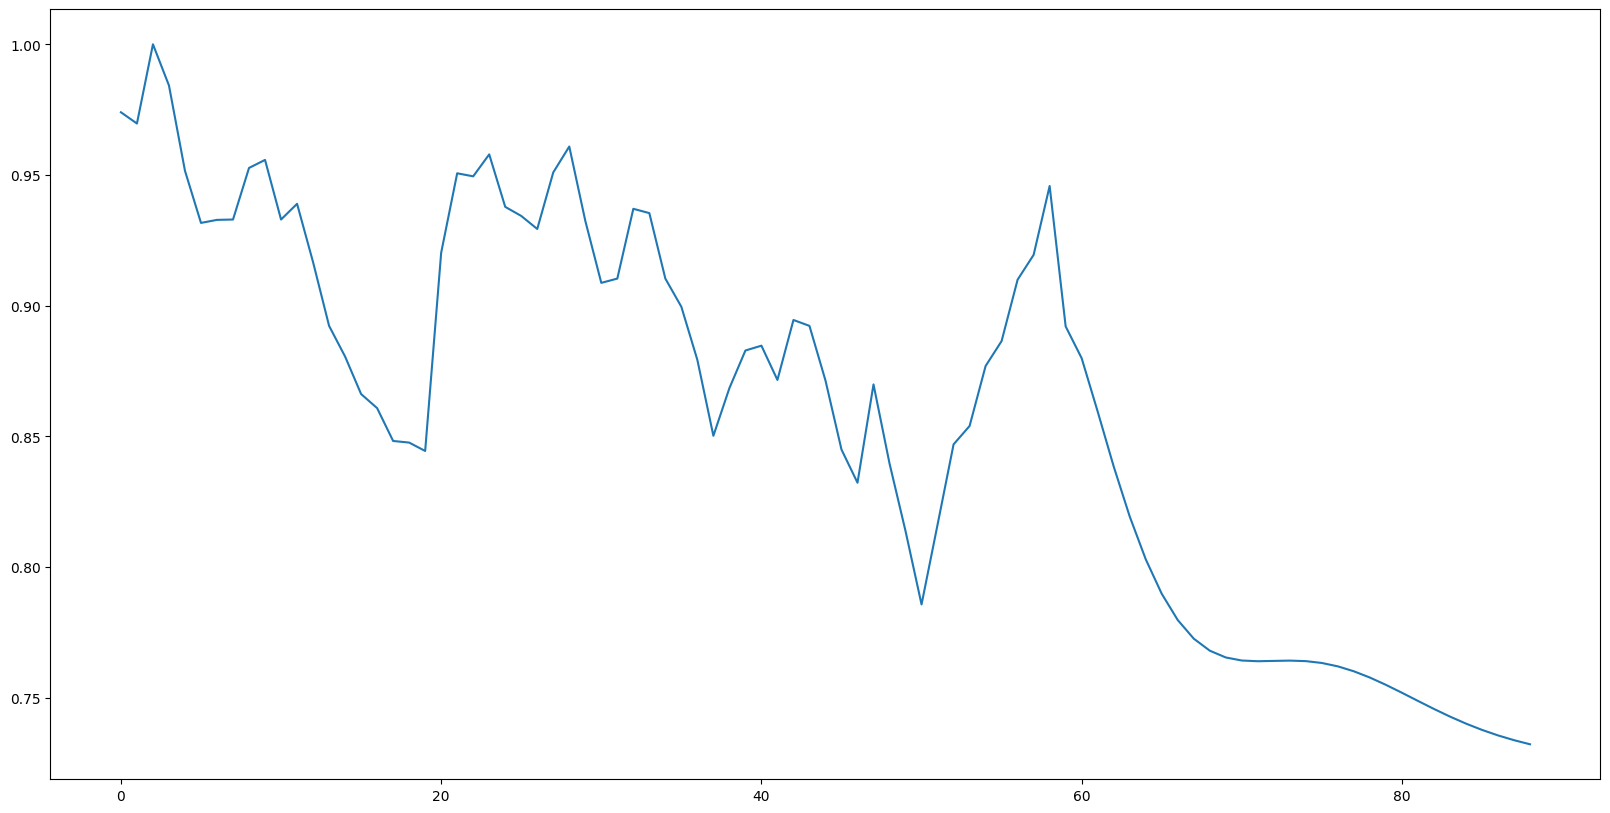

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[850:])

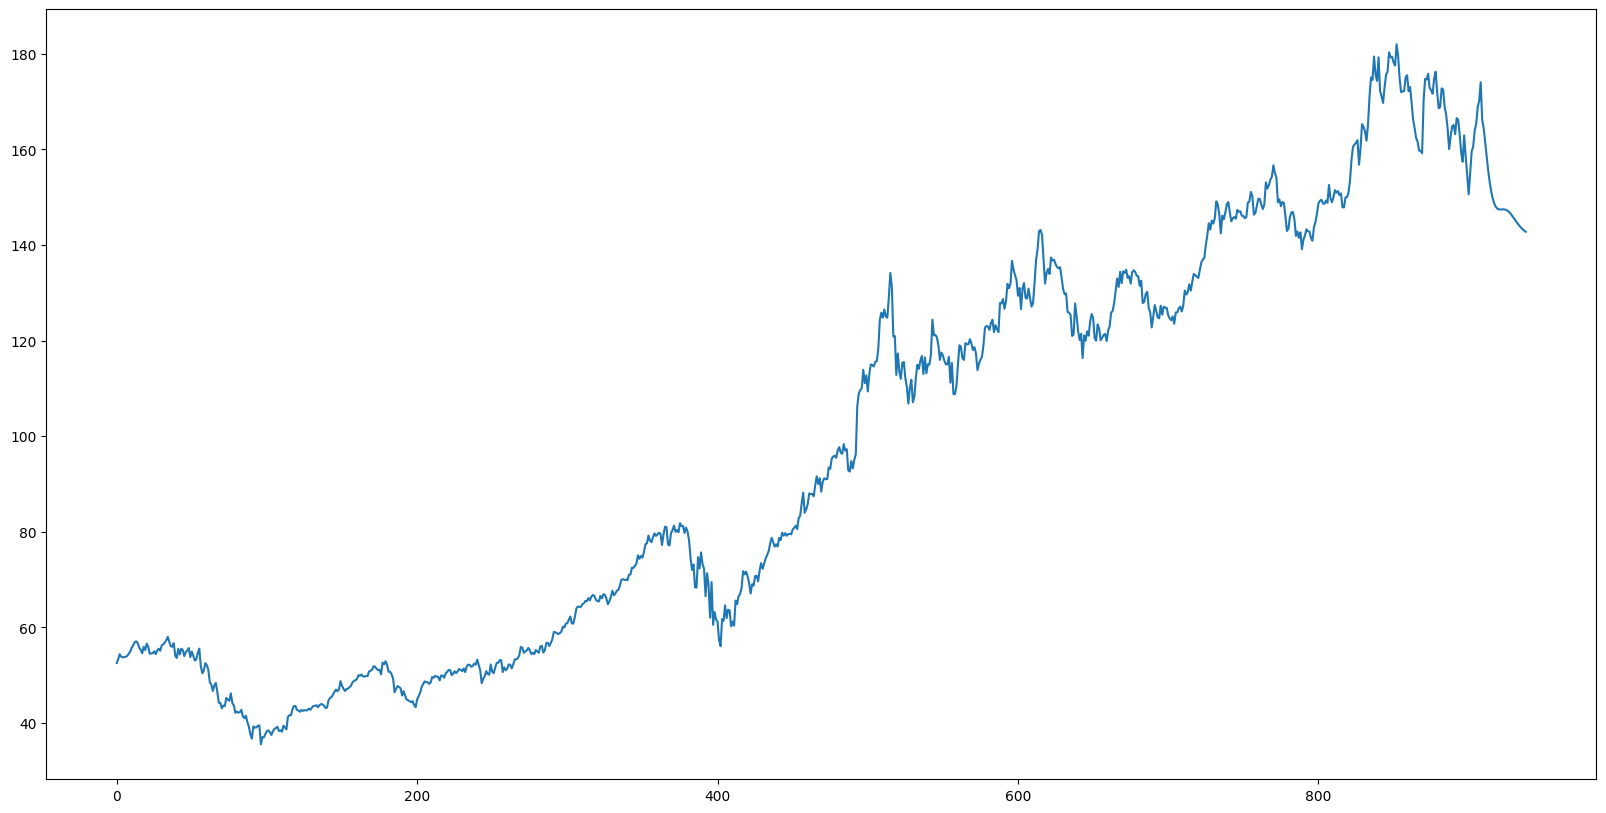

In [56]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)